## Цель работы

Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

## Вариант 

In [1]:
surname = "Шестаков"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  5
задача № 2 - вариант:  1


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)

В качестве индикатора далее будем использовать контроль над коррупцией (Control of Corruption) и его показатели `pctrank` и `estimate`

---

Прежде, чем начнем выполнение, подключим необходимые библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Загрузка датасета WGI

In [3]:
FILE_WGI = "./data/task_1/wgidataset.xlsx"
df_wgi = pd.read_excel(FILE_WGI)

### 2. Сортировка данных по убыванию `pctrank`

Прежде, чем начать работать с датафреймом, выведем первые записи, чтобы посмотреть структуру датафрейма

In [4]:
df_wgi.head()

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,27.419355
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,43.010754
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,52.688171
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,..
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,96.774193


Поскольку в качестве индикатора мы выбрали контроль над корупцией (Control of Corruption), то выберим из датафрейма записи со значением `cc` в столбце `indicator` и сформируем новый датафрейм

In [5]:
df_cc = df_wgi[df_wgi['indicator'] == 'cc']
df_cc.sample(5)

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
11705,PANcc2008,PAN,Panama,2008,cc,-0.101286,0.182235,11,54.368931,41.262135,62.621361
1314,BFAcc1998,BFA,Burkina Faso,1998,cc,0.09559,0.310343,3,57.754009,41.711231,72.192513
4023,SVNcc2002,SVN,Slovenia,2002,cc,0.773913,0.154362,8,76.719574,71.957672,82.53968
22037,VIRcc2016,VIR,Virgin Islands (U.S.),2016,cc,0.578694,0.420323,1,69.047623,53.333332,89.047623
28365,MYScc2021,MYS,Malaysia,2021,cc,0.146233,0.153173,11,59.047619,50,63.809525


Выведем информацию о столбцах

In [6]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5350 entries, 0 to 31029
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codeindyr     5350 non-null   object
 1   code          5350 non-null   object
 2   countryname   5350 non-null   object
 3   year          5350 non-null   int64 
 4   indicator     5350 non-null   object
 5   estimate      5350 non-null   object
 6   stddev        5350 non-null   object
 7   nsource       5350 non-null   object
 8   pctrank       5350 non-null   object
 9   pctranklower  5350 non-null   object
 10  pctrankupper  5350 non-null   object
dtypes: int64(1), object(10)
memory usage: 501.6+ KB


Из вывода прошлой ячейки видно, что столбец `pctrank`, по которому нам необходимо провести сортировку, имеет тип `object`, поэтому нужно преобразовать данный столбец к числовому типу данных. Прежде, чем выполнить преобразование, посмотрим, какие значения содержатся в данном столбце, есть ли пропуски

In [7]:
# вывод уникальных значений столбца pctrank
df_cc['pctrank'].unique()

array([4.301075458526611, 19.354839324951172, 33.33333206176758, ...,
       88.20755004882812, 72.64151000976562, 71.2264175415039],
      dtype=object)

In [8]:
# вывод количества пропусков в каждом столбце
df_cc.isna().sum()

codeindyr       0
code            0
countryname     0
year            0
indicator       0
estimate        0
stddev          0
nsource         0
pctrank         0
pctranklower    0
pctrankupper    0
dtype: int64

In [9]:
# вывод уникальных значений и числа их встречаемости
df_cc['pctrank'].value_counts()

pctrank
..                   207
100                   25
0                     25
88.57142639160156     18
87.14286041259766     16
                    ... 
9.852216720581055      1
68.47290802001953      1
79.31034851074219      1
60.59113311767578      1
71.2264175415039       1
Name: count, Length: 2263, dtype: int64

Из вывода прошлых ячеек можно увидеть, что у нас нет пропущенных значений, но у нас есть 207 записей, которые в столбце `pctrank` содержат два символа точки `..`. При преобразовании типа столбца будем это учитывать, преобразуем эти значения в `NaN`

In [10]:
df_cc['pctrank'] = pd.to_numeric(df_cc['pctrank'], errors='coerce')

C:\Users\Данил\AppData\Local\Temp\ipykernel_22176\4042018287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc['pctrank'] = pd.to_numeric(df_cc['pctrank'], errors='coerce')


В дальнейшем нам надо будет работать со столбцом `estimate`, поэтому его тоже преобразуем к числовому типу данных

In [11]:
print(df_cc['estimate'].value_counts())
df_cc['estimate'] = pd.to_numeric(df_cc['estimate'], errors='coerce')

estimate
..                     207
1.2696630954742432       8
1.2513132095336914       7
1.2702723741531372       7
1.2513561248779297       7
                      ... 
-1.3298110961914062      1
0.9889392256736755       1
1.172405481338501        1
-0.1461135894060135      1
-1.2612160444259644      1
Name: count, Length: 4890, dtype: int64


C:\Users\Данил\AppData\Local\Temp\ipykernel_22176\3486266041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cc['estimate'] = pd.to_numeric(df_cc['estimate'], errors='coerce')


Теперь отсортируем записи по убыванию `pctrank` и выведем для проверки первые записи

In [12]:
df_cc_sorted = df_cc.sort_values('pctrank', ascending=0)
df_cc_sorted.head()

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
30868,DNKcc2023,DNK,Denmark,2023,cc,2.376053,0.166878,9,100.0,98.584908,100
16744,DNKcc2012,DNK,Denmark,2012,cc,2.382462,0.13629,11,100.0,97.630333,100
25819,NZLcc2019,NZL,New Zealand,2019,cc,2.130934,0.155209,9,100.0,95.714287,100
52,DNKcc1996,DNK,Denmark,1996,cc,2.231308,0.210325,6,100.0,93.548386,100
28300,DNKcc2021,DNK,Denmark,2021,cc,2.333371,0.162224,10,100.0,97.14286,100


### 3. Построение горизонтального столбчатого графика

Отобразим данные по индексу WGI за 2023 год в виде горизонтального столбчатого графика по показателю `pctrank`

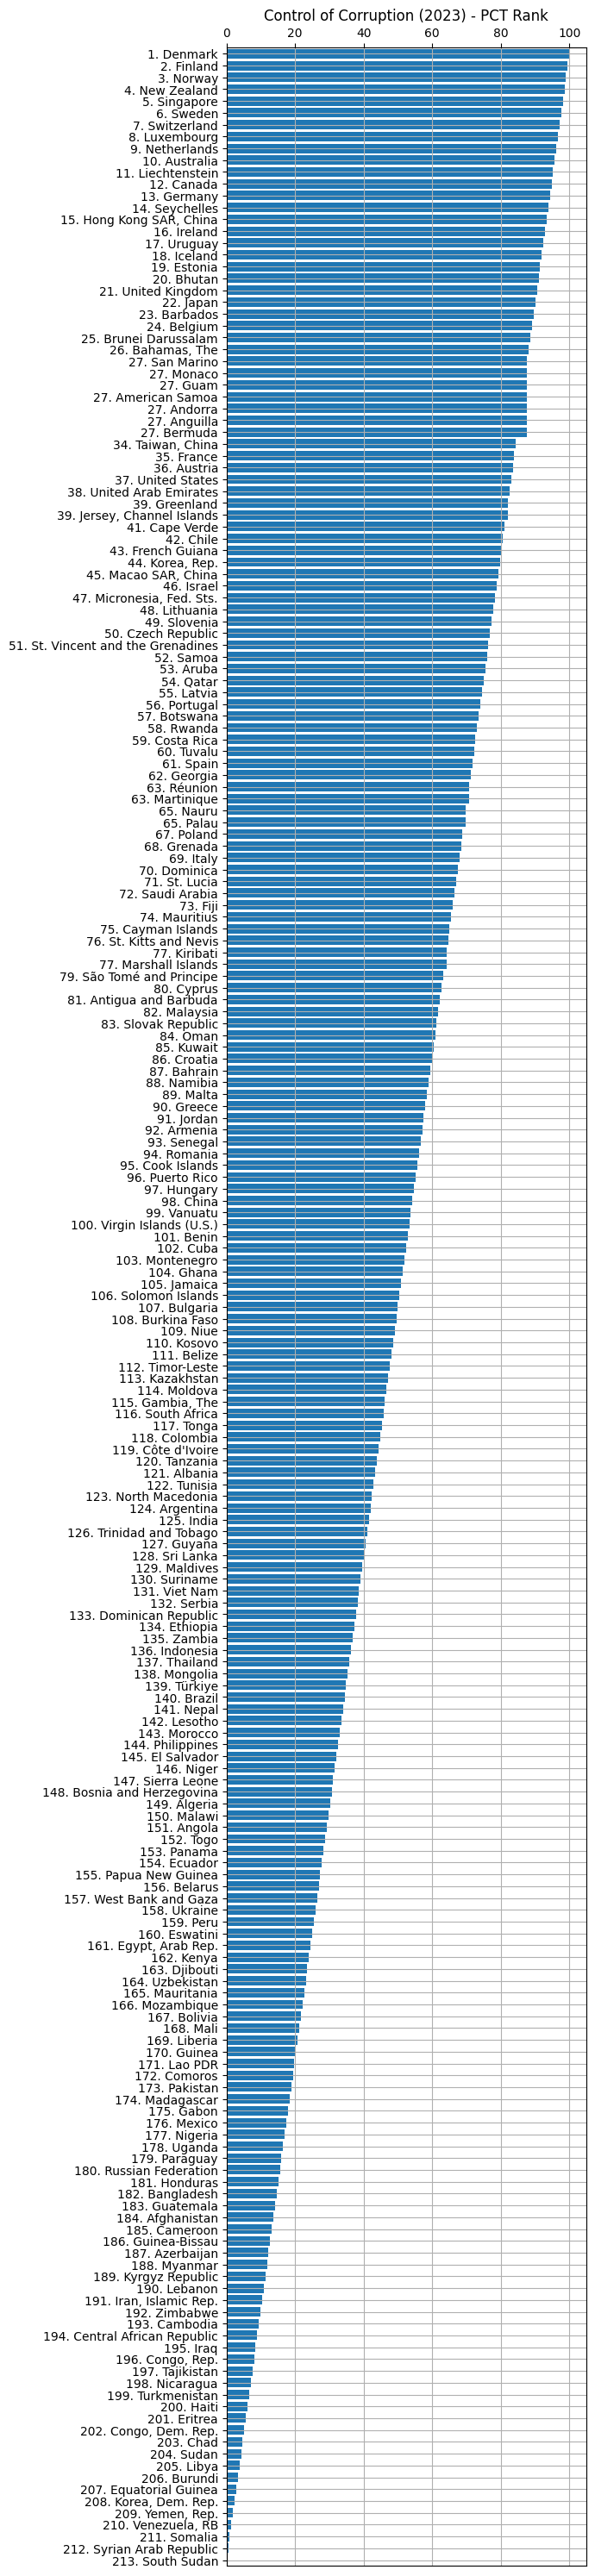

In [13]:
# датафрейм с данными по индексу за 2023 год (без пропущенных значений pctrank)
df_data_2023 = df_cc_sorted[df_cc_sorted['year'] == 2023].dropna(subset=['pctrank'])

# формируем столбец rank, чтобы при построении графика указывать позицию страны
df_data_2023['rank'] = df_data_2023['pctrank'].rank(method='min', ascending=False)

# формирование списка строк с названиями стран и их позициями
labels = [f"{int(row['rank'])}. {row['countryname']}" for _, row in df_data_2023.iterrows()]

# формирование и вывод графика
fig, ax = plt.subplots(figsize=(7, 30))
plt.barh(df_data_2023['countryname'], df_data_2023['pctrank'])
plt.title('Control of Corruption (2023) - PCT Rank')
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_yticks(df_data_2023['countryname'], labels=labels)
ax.set_ylim(len(df_data_2023) - 0.5, -0.5)
plt.tight_layout()
plt.grid(True)
plt.show()

### 4. Формирование датафрейма для региона заданного варианта

Необходимо сформировать датафрейм из исходного для региона в соответствии с вариантом. У меня вариант 5 - Sub Saharan Africa.

Чтобы отобрать нужные страны, сначала загрузим и просмотрим датасет с регионами

In [14]:
FILE_REGIONS = "./data/task_1/regions.xlsx"
df_regions = pd.read_excel(FILE_REGIONS)
df_regions.head()

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME


Посмотрим дополнительную информацию о датафрейме с регионами

In [15]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  180 non-null    object
 1   Code     180 non-null    object
 2   Region   180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


Выведем уникальные значения столбца `Region`

In [16]:
df_regions['Region'].unique()

array(['AP', 'ECA', 'MENA', 'SSA', 'AME', 'WE/EU'], dtype=object)

Из вывода видно, что в значениях есть наш вариант - `SSA` (Sub Saharan Africa)

Сформируем новый датафрейм, в который отберем страны из региона `SSA`. Для этого из датафрейма с регионами отберем коды стран, которые входят в `SSA`, после чего отберем строки из исходного датафрейма, коды которых будут совпадать отобранными нами кодами

In [17]:
# формирование numpy массива с кодами стран региона SSA
l_codes = df_regions[df_regions['Region'] == 'SSA']['Code'].unique()
l_codes

array(['AGO', 'BEN', 'BWA', 'BFA', 'BDI', 'CPV', 'CMR', 'CAF', 'TCD',
       'COM', 'COG', 'CIV', 'COD', 'DJI', 'GNQ', 'ERI', 'SWZ', 'ETH',
       'GAB', 'GMB', 'GHA', 'GIN', 'GNB', 'KEN', 'LSO', 'LBR', 'MDG',
       'MWI', 'MLI', 'MRT', 'MUS', 'MOZ', 'NAM', 'NER', 'NGA', 'RWA',
       'STP', 'SEN', 'SYC', 'SLE', 'SOM', 'ZAF', 'SSD', 'SDN', 'TZA',
       'TGO', 'UGA', 'ZMB', 'ZWE'], dtype=object)

In [18]:
# формирование нового датафрейма путем отбора стран из исходного датафрейма, чьи коды есть в сформированном выше массиве
df_ssa = df_cc[df_cc['code'].isin(l_codes)]
df_ssa.head()

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
5,AGOcc1996,AGO,Angola,1996,cc,-1.167702,0.262077,4,9.677420,0.537634,27.419355
21,BENcc1996,BEN,Benin,1996,cc,-0.548115,0.340507,2,34.946236,13.44086,57.526882
26,BWAcc1996,BWA,Botswana,1996,cc,0.817961,0.262077,4,77.419357,66.129036,84.946236
30,BFAcc1996,BFA,Burkina Faso,1996,cc,0.111519,0.315914,3,60.215054,41.39785,73.118279
31,BDIcc1996,BDI,Burundi,1996,cc,-0.680635,0.340507,2,30.645161,6.989247,52.688171


Проверим, все ли страны нашего региона из датафрейма с регионами есть в полученном датафрейме. Для этого выведем, сколько стран `SSA` было в датафрйме с регионами и сколько сран в полученном нами датафрейме

In [19]:
print(f"В датафрейме с регионами {df_regions[df_regions['Region'] == 'SSA']['Country'].size} стран")
print(f"В полученном датафрейме {df_ssa['countryname'].unique().size} стран")

В датафрейме с регионами 49 стран
В полученном датафрейме 48 стран


Из вывода видно, что одной страны нет в полученном датафрейме. Проверим, была ли эта страна в исходном датафрейме. Для начала, выясним код этой страны

In [20]:
lost_countries = []

# если страны нет в новом датафрейме, то добавляем в список
for code in df_regions[df_regions['Region'] == 'SSA']['Code']:
    if code not in df_ssa['code'].unique():
        lost_countries.append(code)

lost_countries

['COD']

Из вывода видно, что у этой страны код - `COD`. Проверим, были ли в исходном датафрейме записи с таким кодом

In [21]:
df_cc[df_cc['code'] == 'COD']

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper


В исходном датафрейме стран с таким кодом нет. Выведем из датафрейма с регионами название страны

In [22]:
df_regions[df_regions['Code'] == 'COD']

,Country,Code,Region
41,Democratic Republic of the Congo,COD,SSA


Мы узнали, что в датафрейме с регионами название страны - `Democratic Republic of the Congo`. Попробуем найти записи в исходном датафрейме, в названии стран которых содержится подстрока `"congo"`

In [23]:
df_cc[df_cc['countryname'].str.lower().str.contains("congo")]

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
43,ZARcc1996,ZAR,"Congo, Dem. Rep.",1996,cc,-1.647852,0.315914,3,0.000000,0,12.365591
44,COGcc1996,COG,"Congo, Rep.",1996,cc,-0.860740,0.315914,3,23.118280,3.225806,45.698925
1327,ZARcc1998,ZAR,"Congo, Dem. Rep.",1998,cc,-1.416679,0.310343,3,1.069519,0,23.529411
1328,COGcc1998,COG,"Congo, Rep.",1998,cc,-1.198797,0.310343,3,5.882353,0,31.016043
2611,ZARcc2000,ZAR,"Congo, Dem. Rep.",2000,cc,-1.459175,0.329849,3,0.531915,0,20.74468
2612,COGcc2000,COG,"Congo, Rep.",2000,cc,-0.943887,0.329849,3,19.680851,0,43.61702
3895,ZARcc2002,ZAR,"Congo, Dem. Rep.",2002,cc,-1.449971,0.311687,3,1.058201,0,22.222221
3896,COGcc2002,COG,"Congo, Rep.",2002,cc,-1.009018,0.311687,3,16.402117,0,38.62434
5179,ZARcc2003,ZAR,"Congo, Dem. Rep.",2003,cc,-1.526455,0.254753,4,1.058201,0,8.994709
5180,COGcc2003,COG,"Congo, Rep.",2003,cc,-1.090137,0.300546,3,9.523809,0,34.391533


Из вывода видно, что у нас есть две страны с похожими названиями: `Congo, Rep.` с кодом `COG` и `Congo, Dem. Rep.` с кодом `ZAR`. Проверим, есть ли они в полученном нами датафрейме

In [24]:
df_ssa[(df_ssa['code'] == 'COG') | (df_ssa['code'] == 'ZAR')]

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
44,COGcc1996,COG,"Congo, Rep.",1996,cc,-0.860740,0.315914,3,23.118280,3.225806,45.698925
1328,COGcc1998,COG,"Congo, Rep.",1998,cc,-1.198797,0.310343,3,5.882353,0,31.016043
2612,COGcc2000,COG,"Congo, Rep.",2000,cc,-0.943887,0.329849,3,19.680851,0,43.61702
3896,COGcc2002,COG,"Congo, Rep.",2002,cc,-1.009018,0.311687,3,16.402117,0,38.62434
5180,COGcc2003,COG,"Congo, Rep.",2003,cc,-1.090137,0.300546,3,9.523809,0,34.391533
6464,COGcc2004,COG,"Congo, Rep.",2004,cc,-1.036290,0.251565,5,15.270936,2.463054,29.55665
7748,COGcc2005,COG,"Congo, Rep.",2005,cc,-1.059440,0.181625,8,15.121951,4.390244,23.414635
9032,COGcc2006,COG,"Congo, Rep.",2006,cc,-1.108279,0.179485,9,11.707317,2.926829,22.439024
10316,COGcc2007,COG,"Congo, Rep.",2007,cc,-1.160956,0.185537,9,10.194175,1.456311,19.902912
11600,COGcc2008,COG,"Congo, Rep.",2008,cc,-1.193249,0.185101,9,8.737864,1.941748,19.417477


Видно, что `Congo, Rep.` (`COG`) есть в новом датафрейме, значит страна, которая потерялась при соединении датафреймов - `Congo, Dem. Rep.` (`ZAR`). Добавим строки с этой страной к новому датафрейму и еще раз проверяем, сколько стран будет в новом датафрейме по сравнению с датафреймом с регионами

In [25]:
df_ssa = pd.concat([df_ssa, df_cc[df_cc['code'] == 'ZAR']])
print(f"В датафрейме с регионами {df_regions[df_regions['Region'] == 'SSA']['Country'].size} стран")
print(f"В полученном датафрейме {df_ssa['countryname'].unique().size} стран")

В датафрейме с регионами 49 стран
В полученном датафрейме 49 стран


### 5. Вывод данных нового датафрейма

In [26]:
df_ssa

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
5,AGOcc1996,AGO,Angola,1996,cc,-1.167702,0.262077,4,9.677420,0.537634,27.419355
21,BENcc1996,BEN,Benin,1996,cc,-0.548115,0.340507,2,34.946236,13.44086,57.526882
26,BWAcc1996,BWA,Botswana,1996,cc,0.817961,0.262077,4,77.419357,66.129036,84.946236
30,BFAcc1996,BFA,Burkina Faso,1996,cc,0.111519,0.315914,3,60.215054,41.39785,73.118279
31,BDIcc1996,BDI,Burundi,1996,cc,-0.680635,0.340507,2,30.645161,6.989247,52.688171
...,...,...,...,...,...,...,...,...,...,...,...
25723,ZARcc2019,ZAR,"Congo, Dem. Rep.",2019,cc,-1.555470,0.151955,12,3.333333,0,9.523809
27007,ZARcc2020,ZAR,"Congo, Dem. Rep.",2020,cc,-1.592744,0.15246,11,2.380952,0,8.095238
28291,ZARcc2021,ZAR,"Congo, Dem. Rep.",2021,cc,-1.569615,0.150294,11,4.285714,0,6.666667
29575,ZARcc2022,ZAR,"Congo, Dem. Rep.",2022,cc,-1.544922,0.149052,12,3.301887,0.471698,7.075472


In [27]:
df_ssa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 5 to 30859
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codeindyr     1225 non-null   object 
 1   code          1225 non-null   object 
 2   countryname   1225 non-null   object 
 3   year          1225 non-null   int64  
 4   indicator     1225 non-null   object 
 5   estimate      1214 non-null   float64
 6   stddev        1225 non-null   object 
 7   nsource       1225 non-null   object 
 8   pctrank       1214 non-null   float64
 9   pctranklower  1225 non-null   object 
 10  pctrankupper  1225 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 114.8+ KB


### 6. Постройение графика индекса WGI за 1996-2023 для стран региона SSA (по столбцу `estimate`)


Прежде, чем строить график, посмотрим, в каком промежутке годов у нас есть значения

In [28]:
df_ssa['year'].unique()

array([1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023], dtype=int64)

Видно, что есть значения с 1996 по 2023, т.е. нам нет необходимости дополнительно фильтровать датафрейм.

Приступим к построению графика

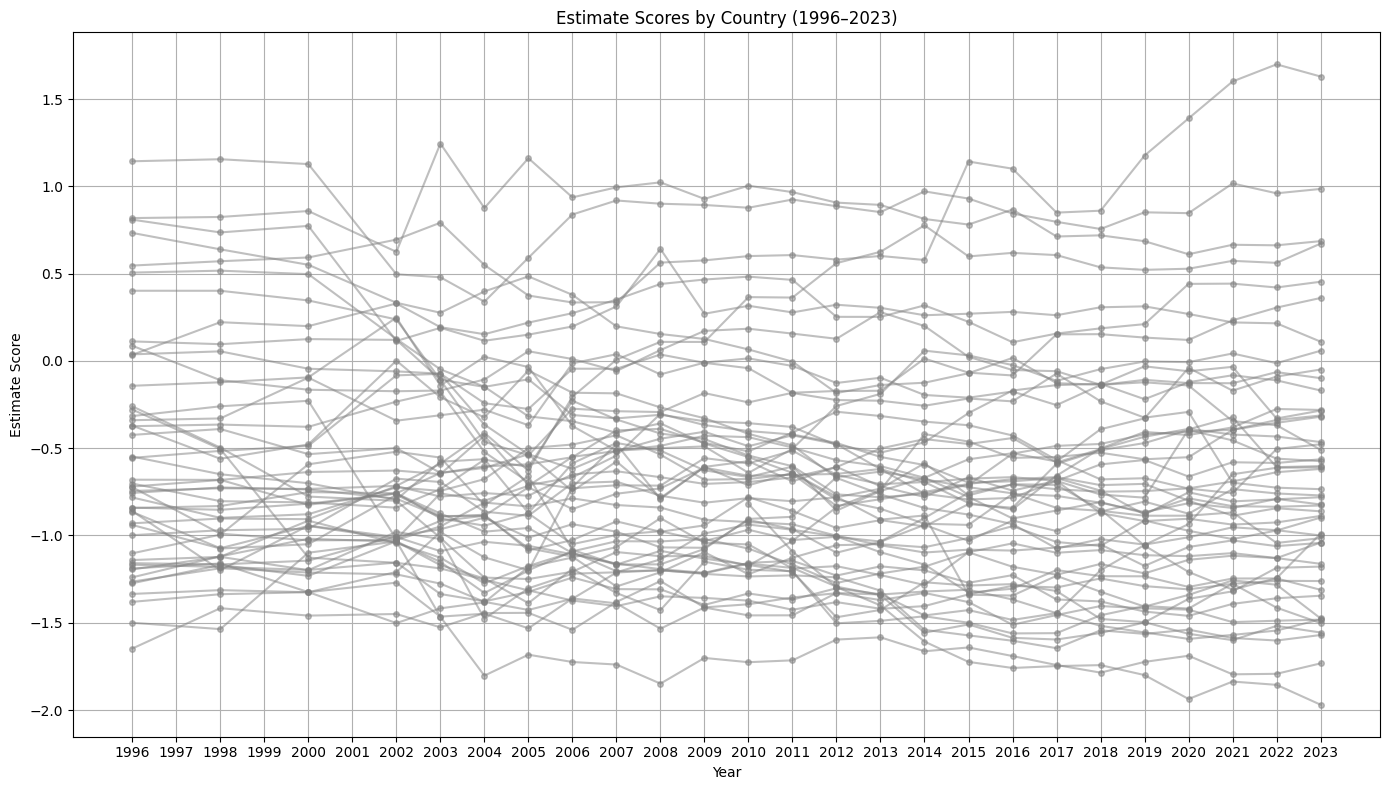

In [29]:
plt.figure(figsize=(14, 8))

# получение списка стран без повторений
countries = df_ssa['countryname'].unique()

# построение графика для каждой страны
for country in countries:
    df_country = df_ssa[df_ssa['countryname'] == country]
    df_country = df_country.sort_values('year')
    plt.plot(
        df_country['year'], 
        df_country['estimate'], 
        marker='o', 
        markersize=4,
        color='gray',
        alpha=0.5
    )

plt.title('Estimate Scores by Country (1996–2023)')
plt.xlabel('Year')
plt.ylabel('Estimate Score')
plt.xticks(range(1996, 2024, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### 7. Поиск стран с наибольшим и наименьшим значением WGI региона SSA за 2023 год (`estimate`)

Поскольку может быть несколько стран с наибольшим/наименьшим значением, то выведем по 3 наибольших/наименьших стран

In [30]:
df_ssa[df_ssa['year'] == 2023].nlargest(n=3, columns=['estimate'])

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
30983,SYCcc2023,SYC,Seychelles,2023,cc,1.628848,0.255538,5,93.867928,84.43396,98.113205
30851,CPVcc2023,CPV,Cape Verde,2023,cc,0.984857,0.206472,8,81.132072,71.698112,88.679245
30842,BWAcc2023,BWA,Botswana,2023,cc,0.685792,0.163091,11,73.584908,64.622643,80.188683


In [31]:
df_ssa[df_ssa['year'] == 2023].nsmallest(n=3, columns=['estimate'])

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,pctrankupper
30991,SSDcc2023,SSD,South Sudan,2023,cc,-1.969555,0.21779,7,0.000000,0,1.886792
30989,SOMcc2023,SOM,Somalia,2023,cc,-1.732834,0.184353,8,0.943396,0,6.132075
30875,GNQcc2023,GNQ,Equatorial Guinea,2023,cc,-1.570373,0.227903,5,2.830189,0,11.792453


Из выводов выше видно, что у нас только по одной стране с наибольшим и наименьшим значением. Сохраним значения в переменные

In [32]:
# получение индекса строки с max значением
id_max = df_ssa[df_ssa['year'] == 2023]['estimate'].idxmax() 

# получение названия страны по индексу
max_country = df_ssa['countryname'][id_max]

# получение индекса строки с min значением
id_min = df_ssa[df_ssa['year'] == 2023]['estimate'].idxmin() 

# получение названия страны по индексу
min_country = df_ssa['countryname'][id_min]

print(f"Max: {max_country}, Min: {min_country}")

Max: Seychelles, Min: South Sudan


### 8. Определение средних значений региона за каждый год в период с 1996 по 2023 (`estimate`)

In [33]:
mean_estimate = df_ssa.groupby('year')['estimate'].mean()
mean_estimate.head()

year
1996   -0.549375
1998   -0.569492
2000   -0.564945
2002   -0.572851
2003   -0.608905
Name: estimate, dtype: float64

### 9. Постройение графикок индекса WGI за 1996-2023 для стран своего региона

Необходимо построить графики индекса WGI за 1996-2023 для стран своего региона (`SSA`) и выделить страны с наибольшим и наименьшим значением WGI за 2023 год, а также отобразить среднее значение по региону и РФ.

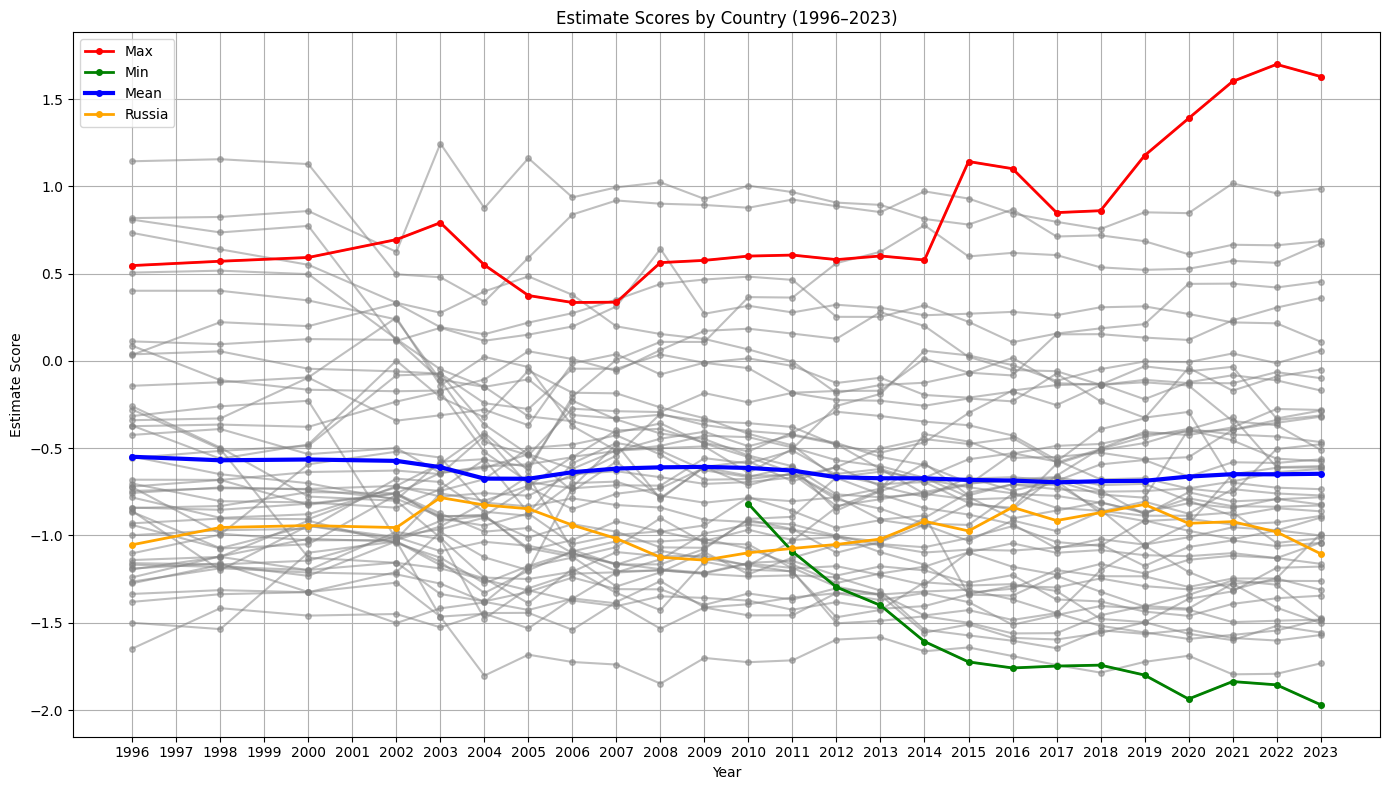

In [34]:
plt.figure(figsize=(14, 8))

# получение списка стран без повторений
countries = df_ssa['countryname'].unique()

# построение графика для каждой страны
for country in countries:
    df_country = df_ssa[df_ssa['countryname'] == country]
    df_country = df_country.sort_values('year')
    plt.plot(
        df_country['year'], 
        df_country['estimate'], 
        marker='o', 
        markersize=4,
        color='gray',
        alpha=0.5
    )

# построение графика для страны с наибольшим индексом
df_max = df_ssa[df_ssa['countryname'] == max_country]
plt.plot(
    df_max['year'], 
    df_max['estimate'], 
    marker='o', 
    linewidth=2, 
    markersize=4,
    color='red',
    label='Max'
)

# построение графика для страны с наименьшим индексом
df_min = df_ssa[df_ssa['countryname'] == min_country]
plt.plot(
    df_min['year'], 
    df_min['estimate'], 
    marker='o', 
    linewidth=2, 
    markersize=4,
    color='green',
    label='Min'
)

# построение графика среднего
plt.plot(
    mean_estimate.index, 
    mean_estimate, 
    marker='o', 
    linewidth=3, 
    markersize=4,
    color='blue',
    label='Mean'
)

# построение графика для России
df_russia = df_cc[df_cc['countryname'] == 'Russian Federation']
plt.plot(
    df_russia['year'], 
    df_russia['estimate'], 
    marker='o', 
    linewidth=2, 
    markersize=4,
    color='orange',
    label='Russia'
)

plt.title('Estimate Scores by Country (1996–2023)')
plt.xlabel('Year')
plt.ylabel('Estimate Score')
plt.xticks(range(1996, 2024, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 10. Определение, как изменилось значение показателя `pctrank` с 1996 по 2023

In [35]:
# создаем сводную таблицу с индексом 'countryname', а столбцами – годами
df_pctrank_change = df_cc[df_cc['year'].isin([1996, 2023])].pivot_table(index='countryname', 
                                                                        columns='year', 
                                                                        values='pctrank',
                                                                        aggfunc='first')

# функция для определения изменения
def compare_change(old, new):
    if pd.isna(old) or pd.isna(new):
        return "-"
    if new > old:
        return "увеличился"
    elif new < old:
        return "уменьшился"
    else:
        return "не изменился"

# применяем функцию к каждой строке и формируем новый столбец
df_pctrank_change['status'] = df_pctrank_change.apply(lambda row: compare_change(row[1996], row[2023]), axis=1)
df_pctrank_change

year,1996,2023,status
countryname,,,
Afghanistan,4.301075,13.679245,увеличился
Albania,19.354839,43.396225,увеличился
Algeria,33.333332,30.188679,уменьшился
American Samoa,NaN,87.735847,-
Andorra,87.096771,87.735847,увеличился
...,...,...,...
Virgin Islands (U.S.),NaN,53.301888,-
West Bank and Gaza,59.139786,26.415094,уменьшился
"Yemen, Rep.",27.419355,1.886792,уменьшился


### 11. Вывод таблицы

Сформируем и выведем таблицу

In [36]:
# находим max/min страны через индексы
id_max = df_ssa[df_ssa['year'] == 2023]['pctrank'].idxmax()
max_country = df_ssa['countryname'][id_max]
id_min = df_ssa[df_ssa['year'] == 2023]['pctrank'].idxmin()
min_country = df_ssa['countryname'][id_min]

# формирование данных о среднем
mean_pctrank = df_ssa.groupby('year')['pctrank'].mean()
mean_change = compare_change(mean_pctrank[1996], mean_pctrank[2023])

# формирование данных о России
russia_wgi_1996 = df_russia[df_russia['year'] == 1996]['pctrank'].iloc[0]
russia_wgi_2023 = df_russia[df_russia['year'] == 2023]['pctrank'].iloc[0]
russia_change = compare_change(russia_wgi_1996, russia_wgi_2023)

# матрица с данными таблицы
data_matrix = [
    ['SSA', '-', mean_pctrank[1996], mean_pctrank[2023], mean_change],
    ['SSA', max_country, df_pctrank_change.loc[max_country, 1996], df_pctrank_change.loc[max_country, 2023], df_pctrank_change.loc[max_country, 'status']],
    ['SSA', min_country, df_pctrank_change.loc[min_country, 1996], df_pctrank_change.loc[min_country, 2023], df_pctrank_change.loc[min_country, 'status']],
    [df_regions[df_regions['Code'] == 'RUS']['Region'].iloc[0], 'Russia', russia_wgi_1996, russia_wgi_2023, russia_change],
]
columns = ['Регион', 'Страна', 'WGI 1996', 'WGI 2023', 'Изменение'] # названия столбцов таблицы
index = ['mean_2023', 'max_2023', 'min_2023', 'Russia_2023'] # индексы таблицы
pd.DataFrame(data=data_matrix, columns=columns, index=index) # формирование датафрейма

,Регион,Страна,WGI 1996,WGI 2023,Изменение
mean_2023,SSA,-,34.083781,30.747016,уменьшился
max_2023,SSA,Seychelles,72.580643,93.867928,увеличился
min_2023,SSA,South Sudan,NaN,0.000000,-
Russia_2023,ECA,Russia,15.053763,15.566038,увеличился


### 13. Отображение диаграммы размаха (boxplot)

Отобразим диаграмму размаха (boxplot) индекса WGI за 2023 для всех стран и для каждого региона в отдельности (на одном графике) (`estimate`)

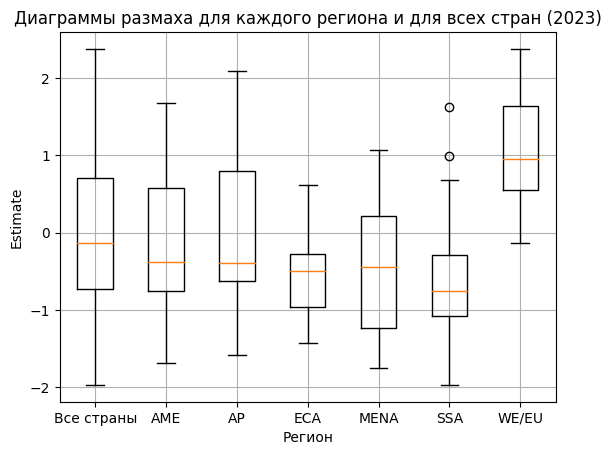

In [37]:
# соединяем два датафрейма по столбцам с кодами левым соединением
df_merged = pd.merge(df_cc, df_regions, left_on='code', right_on='Code', how='left')

# фильтруем данные за 2023 год
df_data_2023 = df_merged[df_merged['year'] == 2023]

# собираем данные по всем странам (все числовые значения estimate)
df_all_estimates = df_data_2023['estimate'].dropna()

# Получаем список уникальных регионов (без пропусков) и сортируем его
regions = sorted(df_data_2023['Region'].dropna().unique())

# для каждого региона собираем числовые значения estimate
region_estimates = [df_data_2023[df_data_2023['Region'] == region]['estimate'].dropna() for region in regions]

# объединяем данные: первым элементом — все страны, затем по регионам
data_for_boxplot = [df_all_estimates] + region_estimates

# подписи для оси Х
labels = ['Все страны'] + regions

# формируем и выводим график
plt.figure()
plt.boxplot(data_for_boxplot, labels=labels)
plt.title("Диаграммы размаха для каждого региона и для всех стран (2023)")
plt.xlabel("Регион")
plt.ylabel("Estimate")
plt.grid(True)
plt.show()

## Задача 2. Анализ рынка акций

---

### 1. Загрузка данных в единый датафрейм

Загрузим данные из нескольких файлов в один датафрейм. В качестве значений индекса датафрейма укажем значения столбца `Date`. Названия столбцов будут соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец `Close` в файлах .csv)

In [38]:
import os

# путь к папке с CSV-файлами
FILES_STOCKS_PATH = './data/task_2'

# формирование списка с полными названиями файлов
files = [f for f in os.listdir(FILES_STOCKS_PATH)]

# датафрейм, в который будем загружать все данные
df_stocks = pd.DataFrame()

# цикл, в котором проходимся по списку с полными названиями файлов,
# загружаем данные из файлов, преобразуем в нужный формат, объединяем
for file in files:
    stock_name = file.replace('.csv', '')
    temp_df = pd.read_csv(FILES_STOCKS_PATH + '/' + file, usecols=['Date', 'Close'])
    temp_df = temp_df.rename(columns={'Close': stock_name})
    temp_df['Date'] = pd.to_datetime(temp_df['Date'])
    temp_df.set_index('Date', inplace=True)
    if df_stocks.empty:
        df_stocks = temp_df
    else:
        df_stocks = df_stocks.join(temp_df, how='outer')

df_stocks.head()

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199
2022-04-01,157.649994,153.210007,395.950012,124.281502,48.980000,21.750000,51.919998,114.109497,47.930000,36.630001,...,185.470001,73.400002,20.520000,NaN,101.650002,23.650000,290.253326,111.820000,31.480000,7.5400
2022-05-01,148.839996,120.870003,416.480011,120.209503,45.049999,20.840000,48.669998,113.762001,38.939999,38.840000,...,186.720001,71.919998,19.650000,NaN,112.769997,22.059999,252.753326,105.169998,23.200001,7.6300


### 2. Расчет корреляционной матрицы для всех акций

In [39]:
corr_matrix = df_stocks.corr()
corr_matrix.head()

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,...,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,...,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,...,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612
AMZN,0.665715,0.830690,0.819614,1.000000,0.404820,0.478171,0.434078,0.912332,0.690644,0.235247,...,0.765294,0.534556,0.666996,0.824934,0.875779,0.309545,0.302321,0.314869,0.796897,0.654564
CSCO,0.589552,0.594365,0.554172,0.404820,1.000000,0.496982,0.494938,0.600025,0.068856,0.214262,...,0.320159,0.463955,0.384233,-0.144612,0.424007,0.257188,0.253808,0.383777,0.326346,0.474311


### 3. Отображение корреляционной матрицы в виде диаграммы

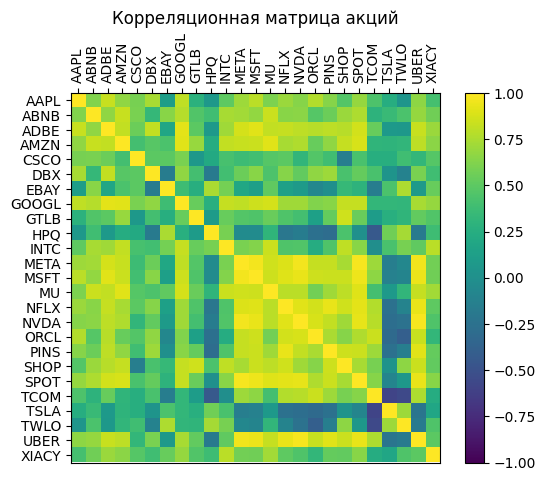

In [40]:
# формирование списка названий акций для формирования подписей на диаграмме
stocks = corr_matrix.columns.tolist()

# формирование и вывод диаграммы
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix, cmap='viridis', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(stocks)))
ax.set_yticks(np.arange(len(stocks)))
ax.set_xticklabels(stocks, rotation=90)
ax.set_yticklabels(stocks)
ax.xaxis.tick_top()
cbar = fig.colorbar(im)
plt.title("Корреляционная матрица акций")
plt.show()

### 4. Определение акций с максимальной положительной/отрицательной/минимальной корреляциями в соответствии с вариантом

Мой вариант - 1, а значит будет определять корреляции для `Microsoft (MSFT)`

In [41]:
target_stock = 'MSFT'

# столбец корреляций MSFT без корреляции к самой себе
corr_with_target = corr_matrix[target_stock].drop(target_stock)

# получение индекса (названия акции) с максимальной положительной корреляцией
max_corr_stock = corr_with_target.idxmax()

# получение индекса (названия акции) с максимальной отрицательной корреляцией
min_corr_stock = corr_with_target.idxmin()

# получение индекса (названия акции) с минимальной корреляцией корреляцией
none_corr_stock = corr_with_target.abs().idxmin()

print(f"Max положительная: {max_corr_stock}")
print(f"Max отрицательная: {min_corr_stock}")
print(f"Min корреляция: {none_corr_stock}")

Max положительная: META
Max отрицательная: TSLA
Min корреляция: HPQ


### 5. Постройение диаграмм разброса

Построим 3 диаграммы разброса: Microsoft - Компания с min, Microsoft - Компания с max, Microsoft - Компания с none

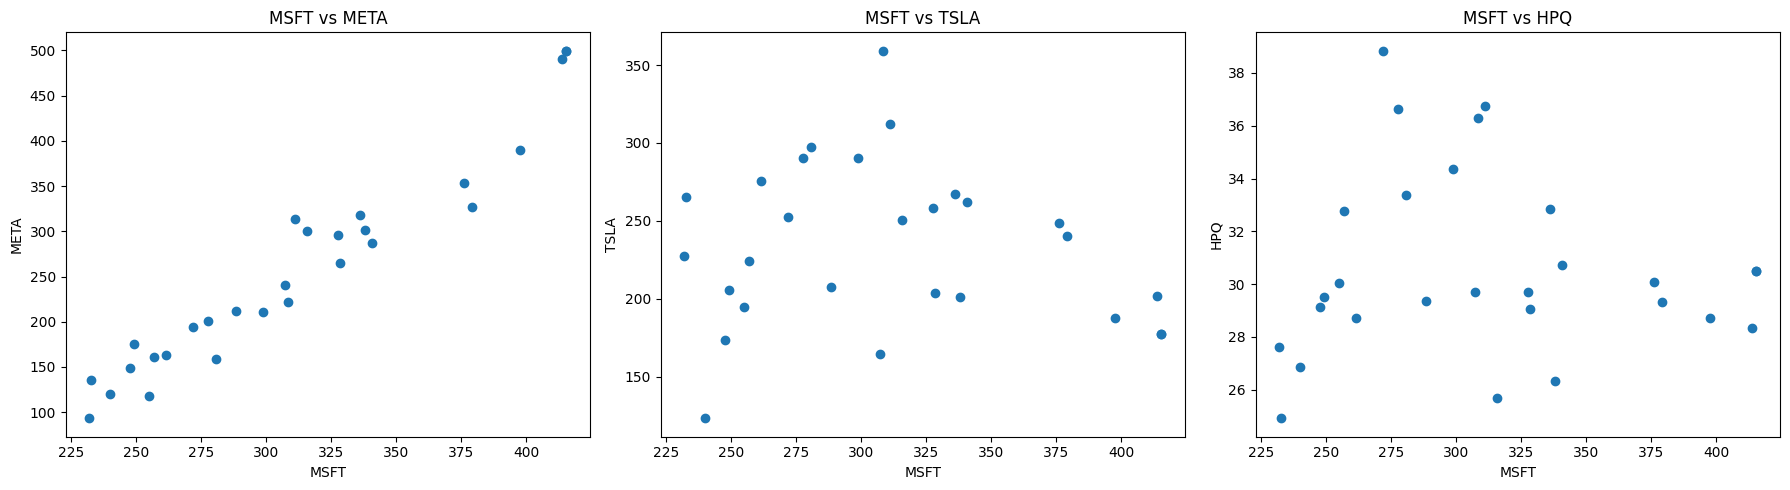

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# формирование списка пар для построения диаграмм
pairs = [
    (target_stock, max_corr_stock),
    (target_stock, min_corr_stock),
    (target_stock, none_corr_stock)
]

# построение в цикле диаграмм
for ax, (x, y) in zip(axes, pairs):
    ax.scatter(df_stocks[x], df_stocks[y])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

### 6. Рассчет средней цены акций для каждого месяца

In [43]:
monthly_avg = df_stocks.mean(axis=1)
monthly_avg.head()

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
dtype: float64

### 7. Построение графика для акций из пунктов 4 и 6

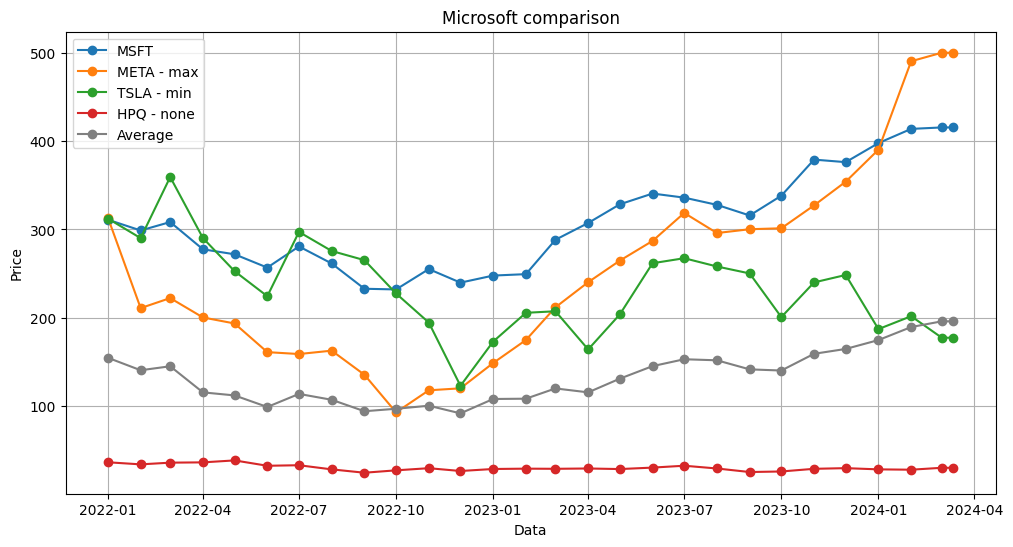

In [44]:
plt.figure(figsize=(12, 6))

# список акций, по которому строим графики
stocks_to_plot = [target_stock, max_corr_stock, min_corr_stock, none_corr_stock]

# создаем метки с указанием типа корреляции
labels = {
    max_corr_stock: f"{max_corr_stock} - max",
    min_corr_stock: f"{min_corr_stock} - min",
    none_corr_stock: f"{none_corr_stock} - none",
    target_stock: target_stock
}

# построение графиков для акций
for stock in stocks_to_plot:
    plt.plot(
        df_stocks.index, 
        df_stocks[stock], 
        marker='o', 
        label=labels[stock]
    )

# график средней цены
plt.plot(
    monthly_avg.index, 
    monthly_avg, 
    marker='o', 
    color='gray', 
    label='Average'
)

plt.xlabel("Data")
plt.ylabel("Price")
plt.title('Microsoft comparison')
plt.legend()
plt.grid(True)
plt.show()

## Вывод

В ходе выполнения работы был приобретен опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.